1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
import scipy as sp

np.random.seed(1204533)

178.64460282415027
8291.666666666668


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


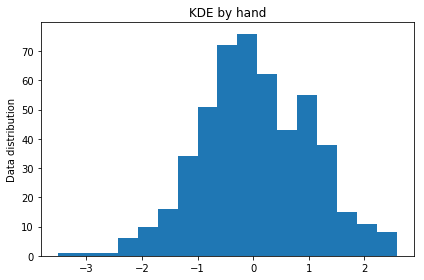

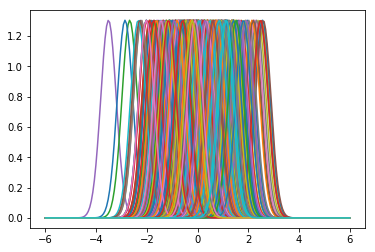

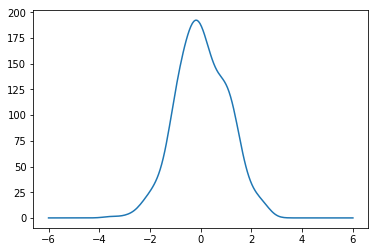

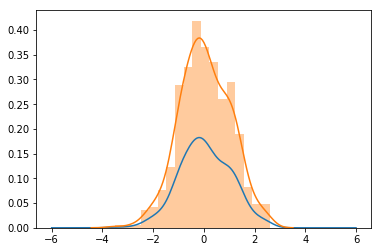

In [25]:
N = 500
mu = 0
sigma = 1
arr = sigma * np.random.randn(N) + mu

# Freedman–Diaconis rule to calculate the width and the number of the bins
bin_width = 2*iqr(arr)*(N)**(-1/3)
max_val = np.max(arr)
min_val = np.min(arr)
numb_bins = int((max_val-min_val)/bin_width)

fig, ax = plt.subplots()
hist = ax.hist(arr,bins=numb_bins)
ax.set_title('KDE by hand')
ax.set_ylabel('Data distribution')
fig.tight_layout()

std_ = 1.06*arr.size**(-1/5)
lin = np.linspace(-6+mu,6+mu,200)
fig, ax = plt.subplots()
arr_gauss = np.zeros((len(arr),len(lin)))
for i,elm in enumerate(arr):
    mu = elm
    f = sp.stats.norm(mu,std_)
    arr_gauss[i]=f.pdf(lin)
    ax.plot(lin,f.pdf(lin))
    

area_hist = bin_width * np.sum(hist[0])
print(area_hist)

matrix = np.sum(arr_gauss,axis=0)
area_gauss = sp.integrate.trapz(matrix)
print(area_gauss)
fig, ax = plt.subplots()
ax.plot(lin,matrix)

normalized_matrix = matrix / np.sqrt((np.sum(matrix**2)))
fig, ax = plt.subplots()
ax.plot(lin,normalized_matrix)   

    

sns.distplot(arr)

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [29]:
mean = [0, 34]
cov = [[23, 0], [0, 31]]

x, y = np.random.multivariate_normal(mean, cov, 5000).T


--2018-11-27 22:32:17--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com... 162.125.69.1
Connecting to www.dropbox.com|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2018-11-27 22:32:18--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7e58b5450e075580290414009b.dl.dropboxusercontent.com/cd/0/inline/AWaAjBdB7OvNhn2c3Un22EYbGdhIEdW74CH7g7MjIowjFAFwIO7n1v_CZTjldOaTYEyzl-8bwHP0GrGF3hBCVHs0yvI9BnwoxtbqZm8UTA0xbxacCUkKNuV1B4_LjInAM2wvdauagcI42GBznxcP5egwYyyYnnmS9YbF0_UFTCULGMiLoStmeWLNgk8MF7QzKKU/file [following]
--2018-11-27 22:32:18--  https://uc7e58b5450e075580290414009b.dl.dropboxusercontent.com/cd/0/inline/AWaAjBdB7OvNhn2c3Un22EYbGdhIEdW74CH7g7MjIowjFAFwIO7n1v_

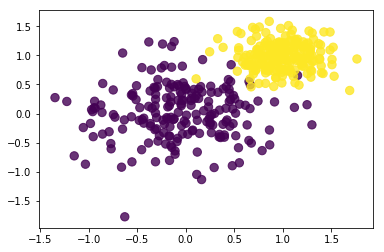

In [15]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot